In [1]:
import geopandas as gpd
from geopandas.tools import overlay
import matplotlib.pyplot as plt
import os 
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler

/tmp/ipykernel_44801/718221896.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd
/opt/conda/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For

## Espacios públicos gdl

In [2]:
schema = 'espacios_publicos'
table = 'ep_amg'
gdf = aup.gdf_from_db(table,schema)
gdf.head()

,Fuente,Tipo,Uso,geometry
0,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672507.028 2272132.201, 672520.126 2..."
1,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672520.126 2272170.353, 672507.028 2..."
2,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672494.325 2272095.205, 672480.366 2..."
3,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672480.366 2272060.731, 672494.325 2..."
4,"OpenStreetMap, [Online]. Disponible: http://ww...",Parque,Uso recreativo,"POLYGON ((672468.717 2272020.613, 672456.895 2..."


In [3]:
gdf.shape

(8499, 4)

## Hexágonos GDL

In [3]:
hex_schema = "hexgrid"
hex_table = "hexgrid_8_city"
c = 'Guadalajara'
query = f'SELECT * FROM {hex_schema}.{hex_table} WHERE \"metropolis\" LIKE \'{c}\''
hex_gdl = aup.gdf_from_query(query, geometry_col='geometry')
hex_gdl.head(5)

,geometry,hex_id_8,CVEGEO,metropolis
0,"POLYGON ((-103.60989 20.39686, -103.61044 20.4...",8849abc91bfffff,14002,Guadalajara
1,"POLYGON ((-103.61277 20.37822, -103.60824 20.3...",8849abc953fffff,14002,Guadalajara
2,"POLYGON ((-103.58960 20.38835, -103.58905 20.3...",8849abc901fffff,14002,Guadalajara
3,"POLYGON ((-103.66739 20.43582, -103.66683 20.4...",8849abc8adfffff,14002,Guadalajara
4,"POLYGON ((-103.66904 20.45140, -103.66452 20.4...",8849ab5249fffff,14002,Guadalajara


## Intersección

In [4]:
gdf = gdf.to_crs(hex_gdl.crs)
print("CRS of gdf:", gdf.crs)
print("CRS of hex_gdl:", hex_gdl.crs)

CRS of gdf: epsg:4326
CRS of hex_gdl: epsg:4326


In [5]:
inter_Gdl = gpd.sjoin(hex_gdl, gdf, op='intersects')
inter_Gdl

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,geometry,hex_id_8,CVEGEO,metropolis,index_right,Fuente,Tipo,Uso
183,"POLYGON ((-103.36270 20.63071, -103.36778 20.6...",88498c9653fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo
326,"POLYGON ((-103.36832 20.63804, -103.37340 20.6...",8849ab5925fffff,14039,Guadalajara,3521,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,5578,"Carta topográfica1:20,000, INEGI.",Glorieta,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7475,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
184,"POLYGON ((-103.34995 20.69490, -103.34941 20.6...",88498c96a5fffff,14039,Guadalajara,7477,"Digitalizado por IIEG, 2018.",Camellón,Sin uso recreativo
...,...,...,...,...,...,...,...,...
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,278,Instrumentos de planeación urbana. Disponible:...,Espacio verde vecinal,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,279,Instrumentos de planeación urbana. Disponible:...,Espacio verde vecinal,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,284,Instrumentos de planeación urbana. Disponible:...,Glorieta,Sin uso recreativo
3265,"POLYGON ((-103.46593 20.82810, -103.47047 20.8...",8849ab48e5fffff,14120,Guadalajara,280,Instrumentos de planeación urbana. Disponible:...,Parque,Uso recreativo


In [6]:
def mapear_tipo(valor):
    tipos_1 = ['Parque', 'Plaza', 'Área natural', 'Unidad deportiva', 'Espacio verde vecinal', 'Área natural protegida']
    if valor in tipos_1:
        return 1
    elif valor in ['Glorieta', 'Camellón']:
        return 0
    else:
        return None  # Puedes cambiar esto si deseas manejar otros valores

# Aplicar la función para crear la nueva columna
inter_Gdl['EspVerPub'] = inter_Gdl['Tipo'].apply(mapear_tipo)
inter_Gdl.drop(columns=['index_right','Fuente','Uso'], inplace=True)

## Hexágonos con info de humedad, vegetación y temperatura

select {tempe}.hex_id, {tempe}.geometry, {tempe}.city, {tempe}.res,

temperature_std, temperature_median, temperature_max, temperature_min, temperature_diff, temperature_tend,temp_diff_mean,

ndvi_mean, ndvi_std, ndvi_median, ndvi_max, ndvi_min, ndvi_diff, ndvi_tend,

ndmi_mean, ndmi_std, ndmi_median, ndmi_max, ndmi_min, ndmi_diff, ndmi_tend

from raster_analysis.temperature_analysis_hex tempe

inner join raster_analysis.ndmi_analysis_hex ndmi

on tempe.hex_id = ndmi.hex_id 

inner join raster_analysis.ndvi_analysis_hex ndvi

on tempe.hex_id = ndvi.hex_id 

where tempe.city  = 'Guadalajara' and tempe.res = 11

In [8]:
#hex_schema = "raster_analysis"
#hex_table = "temperature_analysis_hex"
#hex_tabl = "ndvi_analysis_hex"
#hex_tablee = "ndmi_analysis_hex"
#tempe = "tempe"
#ndmi = "ndmi"
#ndvi = "ndvi"
#hex_id = "hex_id"
#c = 'Guadalajara'
#n = '11'
#query = f'SELECT {tempe}.hex_id, {tempe}.geometry, {tempe}.city, {tempe}.res, temperature_std, temperature_median, temperature_max, temperature_min, temperature_diff, temperature_tend,temp_diff_mean,ndvi_mean, ndvi_std, ndvi_median, ndvi_max, ndvi_min, ndvi_diff, ndvi_tend,ndmi_mean, ndmi_std, ndmi_median, ndmi_max, ndmi_min, ndmi_diff, ndmi_tend FROM {hex_schema}.{hex_table} {tempe} INNER JOIN {hex_schema}.{hex_tablee} {ndmi} ON {tempe}.{hex_id} = {ndmi}.{hex_id} INNER JOIN {hex_schema}.{hex_tabl} {ndvi} ON {tempe}.{hex_id} = {ndvi}.{hex_id} WHERE {tempe}.\"city\" = \'{c}\' AND {tempe}.\"res\" = {n}'
#int_gdl = aup.gdf_from_query(query, geometry_col='geometry')
#int_gdl.head(10)

select {tempe}.hex_id, {tempe}.geometry, {tempe}.city, {tempe}.res,

temp_diff_mean,

ndvi_mean, ndvi_std, ndvi_median, ndvi_max, ndvi_min, ndvi_diff, ndvi_tend,

ndmi_mean, ndmi_median, ndmi_diff

from raster_analysis.temperature_analysis_hex tempe

inner join raster_analysis.ndmi_analysis_hex ndmi

on tempe.hex_id = ndmi.hex_id 

inner join raster_analysis.ndvi_analysis_hex ndvi

on tempe.hex_id = ndvi.hex_id 

where tempe.city  = 'Guadalajara' and tempe.res = 11

In [7]:
hex_schema = "raster_analysis"
hex_table = "temperature_analysis_hex"
hex_tabl = "ndvi_analysis_hex"
hex_tablee = "ndmi_analysis_hex"
tempe = "tempe"
ndmi = "ndmi"
ndvi = "ndvi"
hex_id = "hex_id"
c = 'Guadalajara'
n = '11'
query = f'SELECT {tempe}.hex_id, {tempe}.geometry, {tempe}.city, {tempe}.res, temp_diff_mean,ndvi_mean, ndvi_std, ndvi_median, ndvi_max, ndvi_min, ndvi_diff, ndvi_tend,ndmi_mean, ndmi_median, ndmi_diff FROM {hex_schema}.{hex_table} {tempe} INNER JOIN {hex_schema}.{hex_tablee} {ndmi} ON {tempe}.{hex_id} = {ndmi}.{hex_id} INNER JOIN {hex_schema}.{hex_tabl} {ndvi} ON {tempe}.{hex_id} = {ndvi}.{hex_id} WHERE {tempe}.\"city\" = \'{c}\' AND {tempe}.\"res\" = {n}'
intt_gdl = aup.gdf_from_query(query, geometry_col='geometry')
intt_gdl.head(10)

,hex_id,geometry,city,res,temp_diff_mean,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,ndmi_mean,ndmi_median,ndmi_diff
0,8b49ab4b4251fff,"POLYGON ((-103.42699 20.71866, -103.42681 20.7...",Guadalajara,11,1.081077,0.315405,0.206241,0.206408,0.711147,0.128978,0.582168,-0.000559,-0.025509,-0.102273,0.468677
1,8b49ab4b4385fff,"POLYGON ((-103.42244 20.71412, -103.42227 20.7...",Guadalajara,11,-2.591753,0.285744,0.064639,0.313281,0.337199,0.195493,0.141706,-0.001637,0.064559,0.059237,0.098502
2,8b49ab4aa743fff,"POLYGON ((-103.49977 20.79504, -103.49960 20.7...",Guadalajara,11,0.136053,0.108293,0.035416,0.111677,0.149571,0.079000,0.070571,-0.001220,-0.062980,-0.065607,0.088602
3,8b49ab4aa702fff,"POLYGON ((-103.49636 20.79280, -103.49619 20.7...",Guadalajara,11,-1.300984,0.268614,0.068963,0.271376,0.366145,0.154954,0.211191,-0.000958,-0.002400,-0.009385,0.137231
4,8b49ab4aa708fff,"POLYGON ((-103.49764 20.79364, -103.49747 20.7...",Guadalajara,11,-1.062029,0.111060,0.034786,0.106208,0.158824,0.068589,0.090235,-0.000523,-0.069432,-0.076476,0.109003
5,8b49ab4aa74afff,"POLYGON ((-103.50015 20.79581, -103.49998 20.7...",Guadalajara,11,-0.002951,0.146572,0.037804,0.146433,0.193218,0.105053,0.088165,-0.000846,-0.055549,-0.060200,0.081525
6,8b49ab4aa7b0fff,"POLYGON ((-103.49271 20.79299, -103.49254 20.7...",Guadalajara,11,-1.636169,0.204211,0.080563,0.187520,0.331585,0.109939,0.221645,-0.000789,-0.033656,-0.035459,0.157128
7,8b49ab4aa664fff,"POLYGON ((-103.50011 20.79630, -103.49993 20.7...",Guadalajara,11,-0.065898,0.096383,0.031105,0.091949,0.141176,0.065064,0.076112,-0.000523,-0.077999,-0.082769,0.093228
8,8b49ab4aa6e8fff,"POLYGON ((-103.49754 20.79928, -103.49737 20.7...",Guadalajara,11,-0.546701,0.067467,0.026864,0.060379,0.101549,0.034327,0.067222,-0.000437,-0.088711,-0.092489,0.094202
9,8b49ab4aa694fff,"POLYGON ((-103.49185 20.79709, -103.49168 20.7...",Guadalajara,11,1.388195,0.246696,0.155527,0.191733,0.529013,0.112828,0.416185,-0.001436,-0.040983,-0.078909,0.332349


In [8]:
int_gdl = intt_gdl.set_crs("EPSG:4326")
inter_Gdl = inter_Gdl.set_crs("EPSG:4326")

In [9]:
inter = gpd.sjoin(int_gdl, inter_Gdl, op='intersects')
inter.drop(columns=['index_right','city','res'], inplace=True)
inter.head()

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,hex_id,geometry,temp_diff_mean,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,ndmi_mean,ndmi_median,ndmi_diff,hex_id_8,CVEGEO,metropolis,Tipo,EspVerPub
0,8b49ab4b4251fff,"POLYGON ((-103.42699 20.71866, -103.42681 20.7...",1.081077,0.315405,0.206241,0.206408,0.711147,0.128978,0.582168,-0.000559,-0.025509,-0.102273,0.468677,8849ab4b43fffff,14120,Guadalajara,Área natural,1
1,8b49ab4b4385fff,"POLYGON ((-103.42244 20.71412, -103.42227 20.7...",-2.591753,0.285744,0.064639,0.313281,0.337199,0.195493,0.141706,-0.001637,0.064559,0.059237,0.098502,8849ab4b43fffff,14120,Guadalajara,Área natural,1
581,8b49ab4b42d2fff,"POLYGON ((-103.42277 20.72003, -103.42259 20.7...",-0.472974,0.225380,0.094409,0.207373,0.329662,0.140749,0.188913,-0.003043,0.003132,-0.016575,0.167898,8849ab4b43fffff,14120,Guadalajara,Área natural,1
582,8b49ab4b42e8fff,"POLYGON ((-103.42599 20.71956, -103.42581 20.7...",0.651997,0.107072,0.034808,0.098299,0.164305,0.065493,0.098813,0.000485,-0.032773,-0.046947,0.169421,8849ab4b43fffff,14120,Guadalajara,Área natural,1
583,8b49ab4b43a3fff,"POLYGON ((-103.42249 20.71363, -103.42232 20.7...",-2.979919,0.498718,0.138231,0.561401,0.601394,0.301217,0.300177,-0.002865,0.150866,0.148261,0.080441,8849ab4b43fffff,14120,Guadalajara,Área natural,1


In [12]:
inter.shape

(3930168, 18)

In [15]:
pd.isna(inter).sum()

hex_id            0
geometry          0
temp_diff_mean    0
ndvi_mean         0
ndvi_std          0
ndvi_median       0
ndvi_max          0
ndvi_min          0
ndvi_diff         0
ndvi_tend         0
ndmi_mean         0
ndmi_median       0
ndmi_diff         0
hex_id_8          0
CVEGEO            0
metropolis        0
Tipo              0
EspVerPub         0
dtype: int64

# Métodos de Clasificación

## Regresión Logística

In [16]:
y = inter['EspVerPub']
x = inter[['temp_diff_mean', 'ndmi_median', 'ndmi_mean', 'ndmi_diff', 'ndvi_tend','ndvi_diff','ndvi_min','ndvi_max','ndvi_median','ndvi_std','ndvi_mean']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

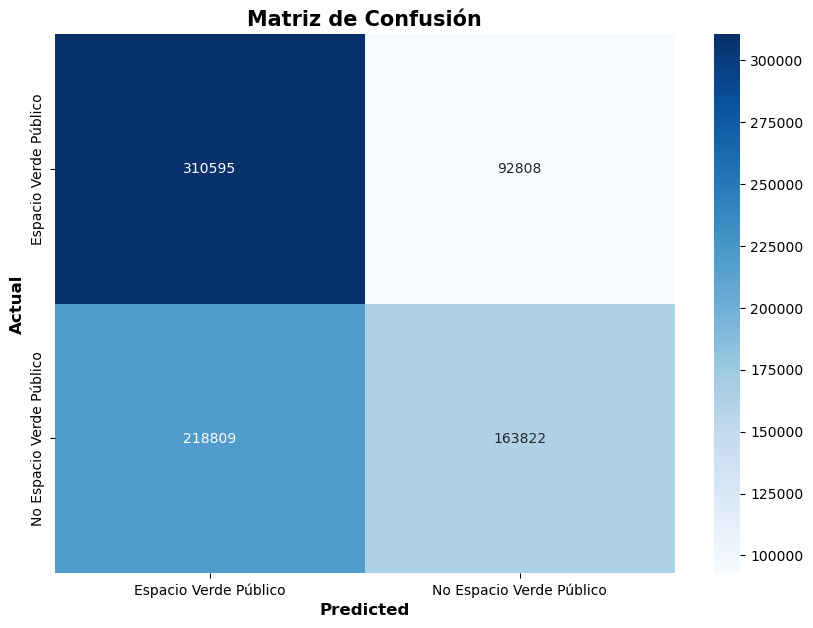

In [17]:
clf = LogisticRegression()
clf.fit(x_train_scale, y_train)
y_pred = clf.predict(x_test_scale)
cm = confusion_matrix(y_test,y_pred)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [18]:
round(accuracy_score(y_test, y_pred), 4)

0.6036

## Naive Bayes

In [1]:
nb = GaussianNB()
nb.fit(x_train, y_train)

NameError: name 'GaussianNB' is not defined

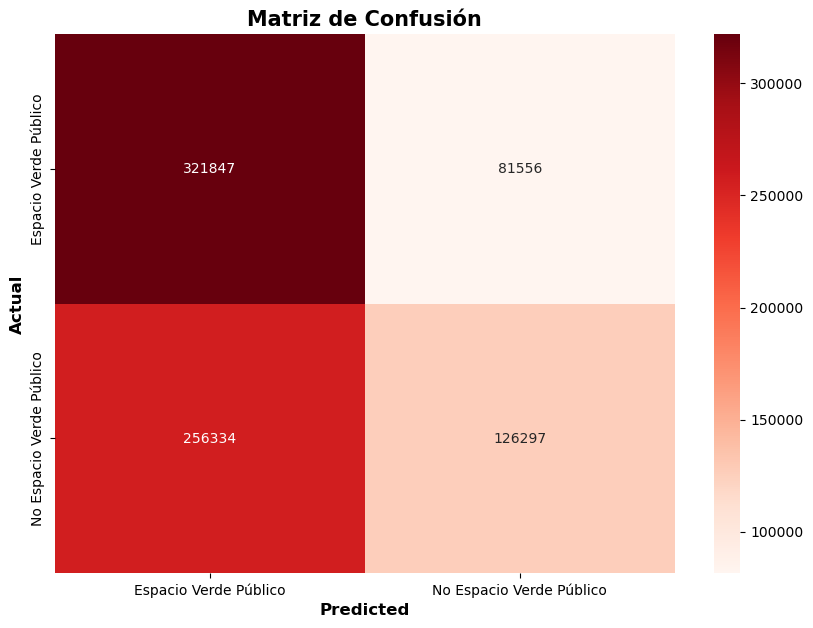

In [20]:
y_prend = nb.predict(x_test)
cm = confusion_matrix(y_test, y_prend)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [21]:
accuracy = accuracy_score(y_test, y_prend)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5701330985682553


Sigue siendo mucho Espacio Verde Público porque lo más seguro es que tenemos muchos hexágonos con espacio público presente y tenemos muy pocos hexágonos con espacio público no presente. Entonces ahora se intentará hacer un submuestreo para ver si ese es el problema.

## Submuestreo

In [10]:
y = inter['EspVerPub']
x = inter[['temp_diff_mean', 'ndmi_median', 'ndmi_mean', 'ndmi_diff', 'ndvi_tend','ndvi_diff','ndvi_min','ndvi_max','ndvi_median','ndvi_std','ndvi_mean']]
clase2=0
clase3=0

for i in y:
  if i==1:
    clase2+=1
  elif i == 0:
    clase3+=1

print(f"\nLa clase 1 tiene {clase2} observaciones")
print(f"\nLa clase 2 tiene {clase3} observaciones")


La clase 1 tiene 1914977 observaciones

La clase 2 tiene 2015191 observaciones


In [11]:
rus = RandomUnderSampler(sampling_strategy="majority")

In [12]:
xL, yL = rus.fit_resample(x, y)

In [13]:
clase2=0
clase3=0

for i in yL:
  if i==1:
    clase2+=1
  elif i == 0:
    clase3+=1

print(f"\nLa clase 1 tiene {clase2} observaciones")
print(f"\nLa clase 2 tiene {clase3} observaciones")


La clase 1 tiene 1914977 observaciones

La clase 2 tiene 1914977 observaciones


Ya que tenemos la misma cantidad de observaciones, veremos como se comportan los métodos de clasificación

## Métodos de clasificación

### Regresión Logística

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xL,yL, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

In [ ]:
clf = LogisticRegression()
clf.fit(x_train_scale, y_train)
y_pred = clf.predict(x_test_scale)
cm = confusion_matrix(y_test,y_pred)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [ ]:
round(accuracy_score(y_test, y_pred), 4)

### Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

In [ ]:
y_prend = nb.predict(x_test)
cm = confusion_matrix(y_test, y_prend)
class_labels = ['Espacio Verde Público', 'No Espacio Verde Público']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = "g", cmap="Reds", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted', fontsize = 12, fontweight  = 'bold')
plt.ylabel('Actual', fontsize = 12, fontweight  = 'bold')
plt.title('Matriz de Confusión', fontsize = 15, fontweight = 'bold')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_prend)
print(f'Accuracy: {accuracy}')